In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
import lightgbm as lgb

In [2]:
# Step 1: Load the dataset
data = pd.read_csv('/Users/charan/Desktop/archive/CrimesOnWomenData.csv')

In [3]:
# Display basic info
print("\nDataset Info:\n")
print(data.info())



Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  736 non-null    int64 
 1   State       736 non-null    object
 2   Year        736 non-null    int64 
 3   Rape        736 non-null    int64 
 4   K&A         736 non-null    int64 
 5   DD          736 non-null    int64 
 6   AoW         736 non-null    int64 
 7   AoM         736 non-null    int64 
 8   DV          736 non-null    int64 
 9   WT          736 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 57.6+ KB
None


In [4]:
print("\nDataset Head:\n")
print(data.head())


Dataset Head:

   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0


In [5]:
print("\nMissing Values:\n")
print(data.isnull().sum())


Missing Values:

Unnamed: 0    0
State         0
Year          0
Rape          0
K&A           0
DD            0
AoW           0
AoM           0
DV            0
WT            0
dtype: int64


In [6]:
# Step 2: Preprocessing
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

In [7]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

data[num_cols] = num_imputer.fit_transform(data[num_cols])
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [26]:
# Step 3: Splitting Data
target = data.columns[-1]
X = data.drop(target, axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Important: Ensure targets are integers for classification
y_train = y_train.astype(int)
y_test = y_test.astype(int)



In [27]:
# Step 4: PCA for dimensionality reduction
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [28]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [29]:
# Step 5: Building Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Results:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Logistic Regression Results:
[[206   0   0   0   0   0]
 [  3   0   0   0   0   0]
 [  6   0   0   0   0   0]
 [  1   0   0   0   0   0]
 [  3   0   0   0   0   0]
 [  2   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       206
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2

    accuracy                           0.93       221
   macro avg       0.16      0.17      0.16       221
weighted avg       0.87      0.93      0.90       221


Random Forest Results:
[[202   4   0   0   0   0]
 [  1   1   1   0   0   0]
 [  1   3   1   1   0   0]
 [  0   0   1   0   0   0]
 [  0   0   1   1   1   0]
 [  0   0   0   0   0   2]]
              precision    recall  f1-score   support

           0       0.9

/Users/charan/airflow_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/charan/airflow_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/charan/airflow_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Use

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/charan/airflow_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/charan/airflow_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/charan/airflow_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/charan/airflow_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision i


Gradient Boosting Results:
[[202   4   0   0   0   0]
 [  1   1   1   0   0   0]
 [  1   3   1   1   0   0]
 [  0   0   1   0   0   0]
 [  0   0   1   1   1   0]
 [  0   0   0   0   0   2]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       206
           1       0.12      0.33      0.18         3
           2       0.25      0.17      0.20         6
           3       0.00      0.00      0.00         1
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         2

    accuracy                           0.94       221
   macro avg       0.56      0.47      0.48       221
weighted avg       0.95      0.94      0.94       221


AdaBoost Results:
[[206   0   0   0   0   0]
 [  3   0   0   0   0   0]
 [  6   0   0   0   0   0]
 [  1   0   0   0   0   0]
 [  3   0   0   0   0   0]
 [  2   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.93      

/Users/charan/airflow_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/charan/airflow_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/charan/airflow_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Use

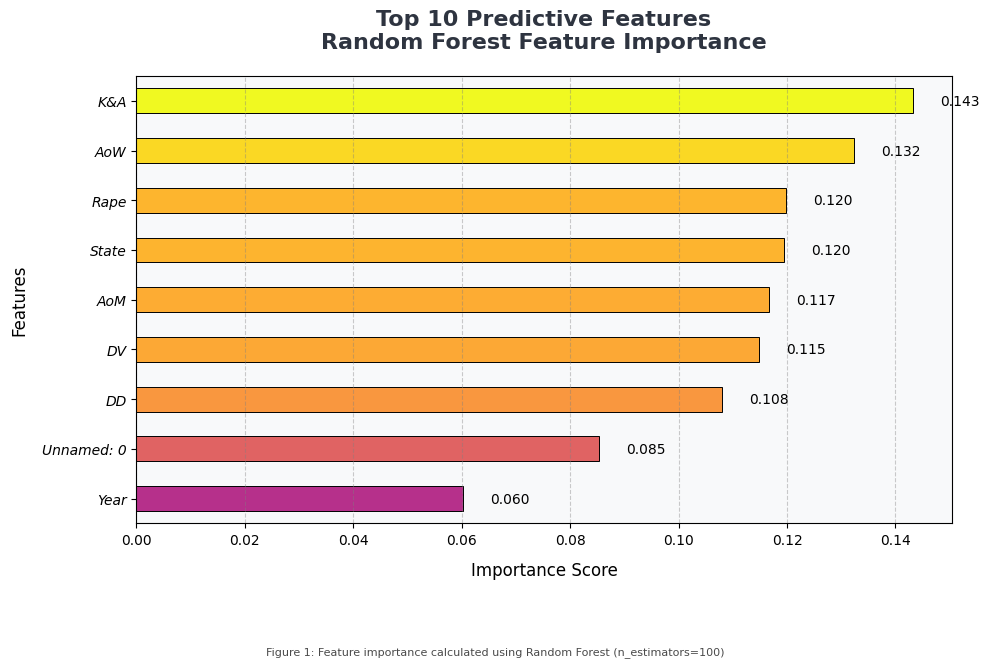

In [30]:
# Modified Feature Importance Plot with Enhanced Styling
plt.figure(figsize=(10,6))
colors = plt.cm.plasma(importances.nlargest(10).values / max(importances.nlargest(10).values))  # Plasma colormap
bars = importances.nlargest(10).plot(kind='barh', 
                                    color=colors,
                                    edgecolor='black',
                                    linewidth=0.7)

# Add annotations
for i, (name, val) in enumerate(importances.nlargest(10).items()):
    plt.text(val + 0.005, i, f'{val:.3f}', va='center', fontsize=10)

# Styling enhancements
plt.title("Top 10 Predictive Features\nRandom Forest Feature Importance", 
         fontsize=16, pad=20, fontweight='bold', color='#2e3440')
plt.xlabel("Importance Score", fontsize=12, labelpad=10)
plt.ylabel("Features", fontsize=12, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, fontstyle='italic')
plt.grid(axis='x', linestyle='--', alpha=0.4, color='grey')
plt.gca().invert_yaxis()  # Highest importance on top
plt.gca().set_facecolor('#f8f9fa')  # Light background
plt.tight_layout()

# Add caption
plt.figtext(0.5, -0.1, "Figure 1: Feature importance calculated using Random Forest (n_estimators=100)",
           ha='center', fontsize=8, color='#4a4a4a')

plt.show()



In [31]:
# Step 7: Hyperparameter Tuning (Random Forest)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("\nBest Params for Random Forest:", grid_rf.best_params_)

/Users/charan/airflow_env/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Best Params for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


/var/folders/19/ltpswf3s5v553l99yyc5p8kh0000gn/T/ipykernel_71953/1291319563.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_scores, y=model_names, palette=colors,


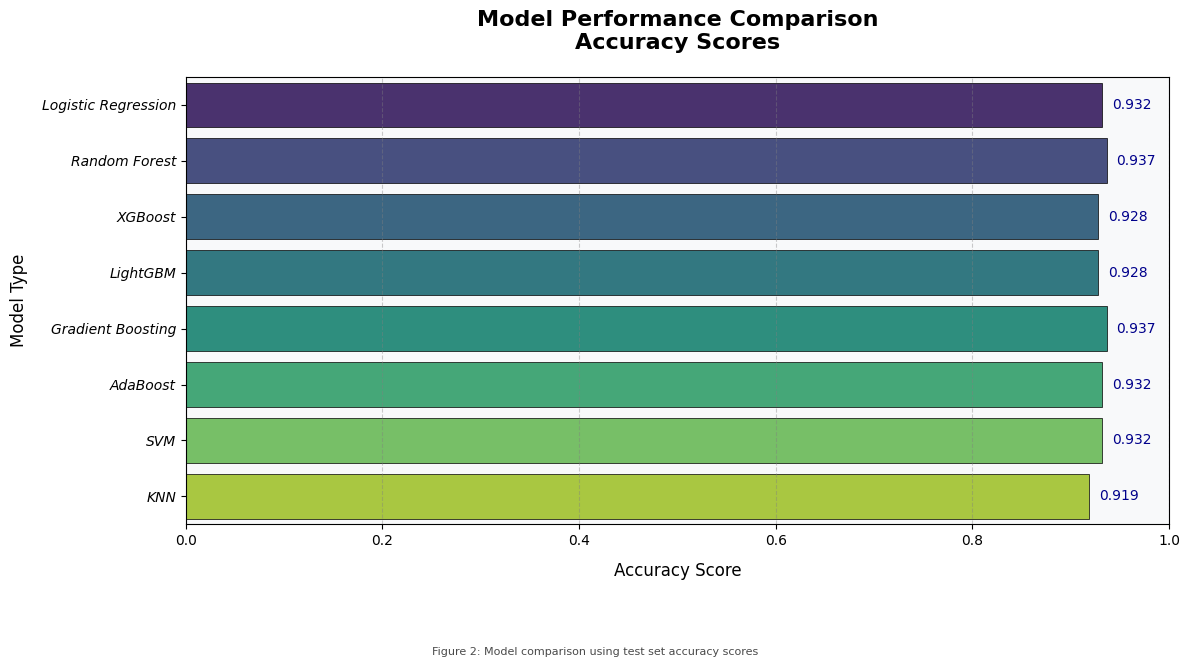

In [34]:
# Enhanced Model Comparison Plot
plt.figure(figsize=(12, 6))
model_names = list(results.keys())
model_scores = list(results.values())

# Create color gradient based on accuracy scores
colors = sns.color_palette("viridis", len(model_scores))

# Create plot with styling
ax = sns.barplot(x=model_scores, y=model_names, palette=colors, 
                edgecolor='black', linewidth=0.5)

# Add value annotations
for i, (name, score) in enumerate(zip(model_names, model_scores)):
    ax.text(score + 0.01, i, f"{score:.3f}", 
            va='center', ha='left', 
            fontsize=10, color='darkblue')

# Style enhancements
plt.title("Model Performance Comparison\nAccuracy Scores", 
         fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Accuracy Score", fontsize=12, labelpad=10)
plt.ylabel("Model Type", fontsize=12, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, fontstyle='italic')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.4, color='grey')
plt.gca().set_facecolor('#f8f9fa')  # Light background
plt.tight_layout()

# Add caption
plt.figtext(0.5, -0.1, "Figure 2: Model comparison using test set accuracy scores", 
           ha='center', fontsize=8, color='#4a4a4a')

plt.show()
